# Designing a RadiaSoft style for matplotlib

With matplotlib, plot parameters are given by a simple dictionary relating specific plot keywards and their values. Matplotlib provides two general means of externally setting plot parameters. 

The first of these is the `matplotlibrc` file, which provides a line-by-line list of keywords and values (e.g. lines.markersize: 5.6). The location of the current rc file is given by `mpl.matplotlib_fname()`. An rc file (different from the default) can be loaded via `mpl.rc_file(fname)` command. By default, the matplotlibrc file location is the same as the location for storing other style libraries. When working in a virtual environment, the matplotlib 'fname' directory may be changed.

The second strategy is to define a `.mplstyle` file. This file has the same syntax as the matplotlib rc file, and is referenced to augment the existing rcParams dictionary of plot parameters. 

This notebook will help to design a RadiaSoft `.mplstyle` file. Using an `.mplstyle` file may be preferable to a fixed matplotlibrc for the following reasons:

- Styles can be loaded on demand via `mpl.style.use('style_name')`
- Styles can be temporarily invoked by wrapping a plot using `with plt.style.context(('style_name')):`
- Multiple styles can be used at once to combine features of each (e.g. color palettes + fonts), for example `plt.style.use(['style_1', 'style_2'])`
- Styles are indexed and their properties are viewable through the `mpl.style.library` dictionary

As mentioned above, these style files are often stored in a subdirectory `stylelib` within the matplotlib directory. By default, matplotlib installs its initial style files in the Python installation directory, for example `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data`. However, a better all-purpose location is in the matplotlib config directory (`mpl.get_configdir()`). This directory (e.g. `/Users/name/.matplotlib`) is guaranteed to be accessible to users and can be edited as desired.

For more information, see this helpful matplotlib style [writeup](http://matplotlib.org/users/style_sheets.html) and this github [example](https://github.com/matplotlib/matplotlib/blob/master/doc/users/style_sheets.rst). 

**Note:** Some of these features are particular to IPython and IPython notebooks. In fact, certain caveats apply when implementing styles in a notebook. In particular, the default rcParams can vary depending upon whether you invoke the `%matplotlib inline` magic. This feature calls upon its own rcParams. This is relevant in case you re-evaluate a cell which runs this command.

**Another note:** The default matplotlib settings are given by `mpl.rcParamsDefault`. They can be loaded using the `mpl.rcdefaults()` command. Alternatively, the matplotlibrc file can be reloaded using the `mpl.rc_file_defaults()` command.


**Installing and using the style files**

1. Find your matplotlib configuration directory (`mpl.get_configdir()`).
2. Make a folder `stylelib/` within that directory
3. Copy your own desired `.mplstyle` files to that folder.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

## Define a default plotting sequence

Here is a default plotting sequence for use with general testing of different features. It's not comprehensive but will suit this notebook.

In [3]:
def example_plot(ax, legend=False,numplots=2, tex=False):
    '''Default plotting function for testing matplotlib rcParams.
    
    Arguments:
        ax (matplotlib.axes.Axes) : matplotlib axis object
        legend (Optional[bool]) : True if you want to plot a legend
        numplots (Optional[int]) : number of lines to plot
        tex (Optional[bool]) : true if using tex features
    
    '''
    
    x = np.arange(11)
    #y_vals = []
    exps = np.linspace(1,2,numplots) #evenly spread exponents
    
    for ind in np.arange(numplots):
        y = x**exps[ind]
        ax.locator_params(nbins=3)
        ax.scatter(x,y)
        ax.plot(x,y, label= 'label {}'.format(ind))
        #ax.scatter(x,y2, label = 'points 2')
        #ax.plot(x,y2, label = 'label 2')
        ax.set_xlabel('x values')
        ax.set_ylabel('y values')
        ax.set_xlim([-0.5,10.5])
        ax.set_ylim([-5,105])
        if tex:
            ax.set_title(r'Plot title with tex - $\rho$ $\sigma_p$')
        else:
            ax.set_title('This is the plot title')
    
    if legend:
        #ax.legend(loc='upper left',bbox_to_anchor=(0.01, 0.99))
        ax.legend(loc='upper left')
        
    plt.tight_layout()
    
    
def example_imshow(ax):
    '''Default imshow function'''
    
    x = np.linspace(-100,100,101)
    y = np.linspace(-100,100,101)
    xy = np.asarray([xv*yv for xv in x for yv in y]).reshape([101,101])
    
    ax.imshow(xy)
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.set_title(r'Plot title with tex - $\rho$ $\sigma_p$')

    plt.tight_layout()
    
    plt.savefig('saved_imshow.pdf',bbox_inches='tight')

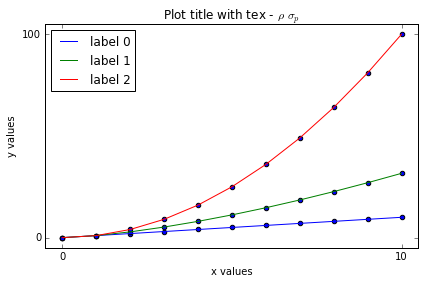

In [4]:
#Default example plot

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, legend=True, numplots=3,tex=True)

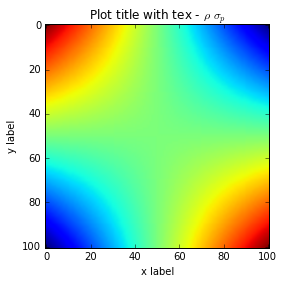

In [5]:
#Default example image show

plt.close('all')
fig, ax = plt.subplots()
example_imshow(ax)

## Examining available styles - the default style `classic`

Again, the `mpl.style` dictionary can be used to navigate the different styles found in .mplstyle files in your `stylelib` directory. Many of these are now included by default in Matplotlib 1.5 and newer.

In [61]:
mpl.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'rs_paper',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'rs_present',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

The `classic` style is the default style, and describes many of the various style parameters available in matplotlib. This file has been loaded below for reference.

In [ ]:
# %load /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle
### Classic matplotlib plotting style as of v1.5


### LINES
# See http://matplotlib.org/api/artist_api.html#module-matplotlib.lines for more
# information on line properties.
lines.linewidth   : 1.0     # line width in points
lines.linestyle   : -       # solid line
lines.color       : b       # has no affect on plot(); see axes.prop_cycle
lines.marker      : None    # the default marker
lines.markeredgewidth  : 0.5     # the line width around the marker symbol
lines.markersize  : 6            # markersize, in points
lines.dash_joinstyle : round        # miter|round|bevel
lines.dash_capstyle : butt          # butt|round|projecting
lines.solid_joinstyle : round       # miter|round|bevel
lines.solid_capstyle : projecting   # butt|round|projecting
lines.antialiased : True         # render lines in antialiased (no jaggies)

### Marker props
markers.fillstyle: full

### PATCHES
# Patches are graphical objects that fill 2D space, like polygons or
# circles.  See
# http://matplotlib.org/api/artist_api.html#module-matplotlib.patches
# information on patch properties
patch.linewidth        : 1.0     # edge width in points
patch.facecolor        : b
patch.edgecolor        : k
patch.antialiased      : True    # render patches in antialiased (no jaggies)

### FONT
#
# font properties used by text.Text.  See
# http://matplotlib.org/api/font_manager_api.html for more
# information on font properties.  The 6 font properties used for font
# matching are given below with their default values.
#
# The font.family property has five values: 'serif' (e.g., Times),
# 'sans-serif' (e.g., Helvetica), 'cursive' (e.g., Zapf-Chancery),
# 'fantasy' (e.g., Western), and 'monospace' (e.g., Courier).  Each of
# these font families has a default list of font names in decreasing
# order of priority associated with them.  When text.usetex is False,
# font.family may also be one or more concrete font names.
#
# The font.style property has three values: normal (or roman), italic
# or oblique.  The oblique style will be used for italic, if it is not
# present.
#
# The font.variant property has two values: normal or small-caps.  For
# TrueType fonts, which are scalable fonts, small-caps is equivalent
# to using a font size of 'smaller', or about 83% of the current font
# size.
#
# The font.weight property has effectively 13 values: normal, bold,
# bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
# 400, and bold is 700.  bolder and lighter are relative values with
# respect to the current weight.
#
# The font.stretch property has 11 values: ultra-condensed,
# extra-condensed, condensed, semi-condensed, normal, semi-expanded,
# expanded, extra-expanded, ultra-expanded, wider, and narrower.  This
# property is not currently implemented.
#
# The font.size property is the default font size for text, given in pts.
# 12pt is the standard value.
#
font.family         : sans-serif
font.style          : normal
font.variant        : normal
font.weight         : normal
font.stretch        : normal
# note that font.size controls default text sizes.  To configure
# special text sizes tick labels, axes, labels, title, etc, see the rc
# settings for axes and ticks. Special text sizes can be defined
# relative to font.size, using the following values: xx-small, x-small,
# small, medium, large, x-large, xx-large, larger, or smaller
font.size           : 12.0
font.serif     : Bitstream Vera Serif, DejaVu Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
font.sans-serif: Bitstream Vera Sans, DejaVu Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
font.cursive   : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
font.fantasy   : Comic Sans MS, Chicago, Charcoal, ImpactWestern, Humor Sans, fantasy
font.monospace : Bitstream Vera Sans Mono, DejaVu Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace

### TEXT
# text properties used by text.Text.  See
# http://matplotlib.org/api/artist_api.html#module-matplotlib.text for more
# information on text properties

text.color          : k

### LaTeX customizations. See http://www.scipy.org/Wiki/Cookbook/Matplotlib/UsingTex
text.usetex         : False  # use latex for all text handling. The following fonts
                             # are supported through the usual rc parameter settings:
                             # new century schoolbook, bookman, times, palatino,
                             # zapf chancery, charter, serif, sans-serif, helvetica,
                             # avant garde, courier, monospace, computer modern roman,
                             # computer modern sans serif, computer modern typewriter
                             # If another font is desired which can loaded using the
                             # LaTeX \usepackage command, please inquire at the
                             # matplotlib mailing list
text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling
                           # unicode strings.
text.latex.preamble :  # IMPROPER USE OF THIS FEATURE WILL LEAD TO LATEX FAILURES
                           # AND IS THEREFORE UNSUPPORTED. PLEASE DO NOT ASK FOR HELP
                           # IF THIS FEATURE DOES NOT DO WHAT YOU EXPECT IT TO.
                           # preamble is a comma separated list of LaTeX statements
                           # that are included in the LaTeX document preamble.
                           # An example:
                           # text.latex.preamble : \usepackage{bm},\usepackage{euler}
                           # The following packages are always loaded with usetex, so
                           # beware of package collisions: color, geometry, graphicx,
                           # type1cm, textcomp. Adobe Postscript (PSSNFS) font packages
                           # may also be loaded, depending on your font settings
text.latex.preview : False

text.dvipnghack : None      # some versions of dvipng don't handle alpha
                            # channel properly.  Use True to correct
                            # and flush ~/.matplotlib/tex.cache
                            # before testing and False to force
                            # correction off.  None will try and
                            # guess based on your dvipng version

text.hinting : auto   # May be one of the following:
                      #   'none': Perform no hinting
                      #   'auto': Use freetype's autohinter
                      #   'native': Use the hinting information in the
                      #             font file, if available, and if your
                      #             freetype library supports it
                      #   'either': Use the native hinting information,
                      #             or the autohinter if none is available.
                      # For backward compatibility, this value may also be
                      # True === 'auto' or False === 'none'.
text.hinting_factor : 8 # Specifies the amount of softness for hinting in the
                        # horizontal direction.  A value of 1 will hint to full
                        # pixels.  A value of 2 will hint to half pixels etc.

text.antialiased : True # If True (default), the text will be antialiased.
                        # This only affects the Agg backend.

# The following settings allow you to select the fonts in math mode.
# They map from a TeX font name to a fontconfig font pattern.
# These settings are only used if mathtext.fontset is 'custom'.
# Note that this "custom" mode is unsupported and may go away in the
# future.
mathtext.cal : cursive
mathtext.rm  : serif
mathtext.tt  : monospace
mathtext.it  : serif:italic
mathtext.bf  : serif:bold
mathtext.sf  : sans\-serif
mathtext.fontset : cm # Should be 'cm' (Computer Modern), 'stix',
                      # 'stixsans' or 'custom'
mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern
                                # fonts when a symbol can not be found in one of
                                # the custom math fonts.

mathtext.default : it # The default font to use for math.
                      # Can be any of the LaTeX font names, including
                      # the special name "regular" for the same font
                      # used in regular text.

### AXES
# default face and edge color, default tick sizes,
# default fontsizes for ticklabels, and so on.  See
# http://matplotlib.org/api/axes_api.html#module-matplotlib.axes
axes.hold           : True    # whether to clear the axes by default on
axes.facecolor      : w       # axes background color
axes.edgecolor      : k       # axes edge color
axes.linewidth      : 1.0     # edge linewidth
axes.grid           : False   # display grid or not
axes.grid.which     : major
axes.grid.axis      : both
axes.titlesize      : large   # fontsize of the axes title
axes.titleweight    : normal  # font weight for axes title
axes.labelsize      : medium  # fontsize of the x any y labels
axes.labelpad       : 5.0     # space between label and axis
axes.labelweight    : normal  # weight of the x and y labels
axes.labelcolor     : k
axes.axisbelow      : False   # whether axis gridlines and ticks are below
                              # the axes elements (lines, text, etc)

axes.formatter.limits : -7, 7 # use scientific notation if log10
                              # of the axis range is smaller than the
                              # first or larger than the second
axes.formatter.use_locale : False # When True, format tick labels
                                  # according to the user's locale.
                                  # For example, use ',' as a decimal
                                  # separator in the fr_FR locale.
axes.formatter.use_mathtext : False # When True, use mathtext for scientific
                                    # notation.
axes.formatter.useoffset      : True    # If True, the tick label formatter
                                        # will default to labeling ticks relative
                                        # to an offset when the data range is very
                                        # small compared to the minimum absolute
                                        # value of the data.

axes.unicode_minus  : True    # use unicode for the minus symbol
                              # rather than hyphen.  See
                              # http://en.wikipedia.org/wiki/Plus_and_minus_signs#Character_codes
axes.prop_cycle    : cycler('color', 'bgrcmyk')
                                           # color cycle for plot lines
                                           # as list of string colorspecs:
                                           # single letter, long name, or
                                           # web-style hex
axes.xmargin        : 0  # x margin.  See `axes.Axes.margins`
axes.ymargin        : 0  # y margin See `axes.Axes.margins`
axes.spines.bottom  : True
axes.spines.left    : True
axes.spines.right   : True
axes.spines.top     : True
polaraxes.grid      : True    # display grid on polar axes
axes3d.grid         : True    # display grid on 3d axes

### TICKS
# see http://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick
xtick.major.size     : 4      # major tick size in points
xtick.minor.size     : 2      # minor tick size in points
xtick.minor.visible  : False
xtick.major.width    : 0.5    # major tick width in points
xtick.minor.width    : 0.5    # minor tick width in points
xtick.major.pad      : 4      # distance to major tick label in points
xtick.minor.pad      : 4      # distance to the minor tick label in points
xtick.color          : k      # color of the tick labels
xtick.labelsize      : medium # fontsize of the tick labels
xtick.direction      : in     # direction: in, out, or inout

ytick.major.size     : 4      # major tick size in points
ytick.minor.size     : 2      # minor tick size in points
ytick.minor.visible  : False
ytick.major.width    : 0.5    # major tick width in points
ytick.minor.width    : 0.5    # minor tick width in points
ytick.major.pad      : 4      # distance to major tick label in points
ytick.minor.pad      : 4      # distance to the minor tick label in points
ytick.color          : k      # color of the tick labels
ytick.labelsize      : medium # fontsize of the tick labels
ytick.direction      : in     # direction: in, out, or inout


### GRIDS
grid.color       :   k       # grid color
grid.linestyle   :   :       # dotted
grid.linewidth   :   0.5     # in points
grid.alpha       :   1.0     # transparency, between 0.0 and 1.0

### Legend
legend.fancybox      : False  # if True, use a rounded box for the
                              # legend, else a rectangle
legend.loc           : upper right
legend.isaxes        : True   # this option is internally ignored
legend.numpoints     : 2      # the number of points in the legend line
legend.fontsize      : large
legend.borderpad     : 0.4    # border whitespace in fontsize units
legend.markerscale   : 1.0    # the relative size of legend markers vs. original
# the following dimensions are in axes coords
legend.labelspacing  : 0.5    # the vertical space between the legend entries in fraction of fontsize
legend.handlelength  : 2.     # the length of the legend lines in fraction of fontsize
legend.handleheight  : 0.7     # the height of the legend handle in fraction of fontsize
legend.handletextpad : 0.8    # the space between the legend line and legend text in fraction of fontsize
legend.borderaxespad : 0.5   # the border between the axes and legend edge in fraction of fontsize
legend.columnspacing : 2.    # the border between the axes and legend edge in fraction of fontsize
legend.shadow        : False
legend.frameon       : True   # whether or not to draw a frame around legend
legend.framealpha    : None    # opacity of of legend frame
legend.scatterpoints : 3 # number of scatter points
legend.facecolor     : inherit   # legend background color (when None inherits from axes.facecolor)
legend.edgecolor     : inherit   # legend edge color (when None inherits from axes.facecolor)



### FIGURE
# See http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
figure.titlesize : medium     # size of the figure title
figure.titleweight : normal   # weight of the figure title
figure.figsize   : 8, 6    # figure size in inches
figure.dpi       : 80      # figure dots per inch
figure.facecolor : 0.75    # figure facecolor; 0.75 is scalar gray
figure.edgecolor : w       # figure edgecolor
figure.autolayout : False  # When True, automatically adjust subplot
                           # parameters to make the plot fit the figure
figure.max_open_warning : 20  # The maximum number of figures to open through
                              # the pyplot interface before emitting a warning.
                              # If less than one this feature is disabled.
figure.frameon : True

# The figure subplot parameters.  All dimensions are a fraction of the
# figure width or height
figure.subplot.left    : 0.125  # the left side of the subplots of the figure
figure.subplot.right   : 0.9    # the right side of the subplots of the figure
figure.subplot.bottom  : 0.1    # the bottom of the subplots of the figure
figure.subplot.top     : 0.9    # the top of the subplots of the figure
figure.subplot.wspace  : 0.2    # the amount of width reserved for blank space between subplots
figure.subplot.hspace  : 0.2    # the amount of height reserved for white space between subplots

### IMAGES
image.aspect : equal             # equal | auto | a number
image.interpolation  : bilinear  # see help(imshow) for options
image.cmap   : jet               # gray | jet etc...
image.lut    : 256               # the size of the colormap lookup table
image.origin : upper             # lower | upper
image.resample  : False
image.composite_image : True

### CONTOUR PLOTS
contour.negative_linestyle :  dashed # dashed | solid
contour.corner_mask : True

# errorbar props
errorbar.capsize: 3

### Boxplots
boxplot.bootstrap: None
boxplot.boxprops.color: b
boxplot.boxprops.linestyle: -
boxplot.boxprops.linewidth: 1.0
boxplot.capprops.color: k
boxplot.capprops.linestyle: -
boxplot.capprops.linewidth: 1.0
boxplot.flierprops.color: b
boxplot.flierprops.linestyle: -
boxplot.flierprops.linewidth: 1.0
boxplot.flierprops.marker: +
boxplot.flierprops.markeredgecolor: k
boxplot.flierprops.markerfacecolor: b
boxplot.flierprops.markersize: 6.0
boxplot.meanline: False
boxplot.meanprops.color: r
boxplot.meanprops.linestyle: -
boxplot.meanprops.linewidth: 1.0
boxplot.medianprops.color: r
boxplot.medianprops.linestyle: -
boxplot.medianprops.linewidth: 1.0
boxplot.notch: False
boxplot.patchartist: False
boxplot.showbox: True
boxplot.showcaps: True
boxplot.showfliers: True
boxplot.showmeans: False
boxplot.vertical: True
boxplot.whiskerprops.color: b
boxplot.whiskerprops.linestyle: --
boxplot.whiskerprops.linewidth: 1.0
boxplot.whiskers: 1.5

### Agg rendering
### Warning: experimental, 2008/10/10
agg.path.chunksize : 0           # 0 to disable; values in the range
                                 # 10000 to 100000 can improve speed slightly
                                 # and prevent an Agg rendering failure
                                 # when plotting very large data sets,
                                 # especially if they are very gappy.
                                 # It may cause minor artifacts, though.
                                 # A value of 20000 is probably a good
                                 # starting point.
### SAVING FIGURES
path.simplify : True   # When True, simplify paths by removing "invisible"
                       # points to reduce file size and increase rendering
                       # speed
path.simplify_threshold : 0.1111111111111111
                               # The threshold of similarity below which
                               # vertices will be removed in the simplification
                               # process
path.snap : True # When True, rectilinear axis-aligned paths will be snapped to
                 # the nearest pixel when certain criteria are met.  When False,
                 # paths will never be snapped.
path.sketch : None # May be none, or a 3-tuple of the form (scale, length,
                   # randomness).
                   # *scale* is the amplitude of the wiggle
                   # perpendicular to the line (in pixels).  *length*
                   # is the length of the wiggle along the line (in
                   # pixels).  *randomness* is the factor by which
                   # the length is randomly scaled.

# the default savefig params can be different from the display params
# e.g., you may want a higher resolution, or to make the figure
# background white
savefig.dpi         : 100      # figure dots per inch
savefig.facecolor   : w        # figure facecolor when saving
savefig.edgecolor   : w        # figure edgecolor when saving
savefig.format      : png      # png, ps, pdf, svg
savefig.bbox        : standard # 'tight' or 'standard'.
                               # 'tight' is incompatible with pipe-based animation
                               # backends but will workd with temporary file based ones:
                               # e.g. setting animation.writer to ffmpeg will not work,
                               # use ffmpeg_file instead
savefig.pad_inches  : 0.1      # Padding to be used when bbox is set to 'tight'
savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.
savefig.directory   : ~        # default directory in savefig dialog box,
                               # leave empty to always use current working directory
savefig.transparent : False    # setting that controls whether figures are saved with a
                               # transparent background by default
savefig.frameon : True
savefig.orientation : portrait

nbagg.transparent: True

# tk backend params
tk.window_focus   : False    # Maintain shell focus for TkAgg

# ps backend params
ps.papersize      : letter   # auto, letter, legal, ledger, A0-A10, B0-B10
ps.useafm         : False    # use of afm fonts, results in small files
ps.usedistiller   : False    # can be: None, ghostscript or xpdf
                                          # Experimental: may produce smaller files.
                                          # xpdf intended for production of publication quality files,
                                          # but requires ghostscript, xpdf and ps2eps
ps.distiller.res  : 6000      # dpi
ps.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)

# pdf backend params
pdf.compression   : 6 # integer from 0 to 9
                      # 0 disables compression (good for debugging)
pdf.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)
pdf.inheritcolor   : False
pdf.use14corefonts : False

# pgf backend params
pgf.debug           : False
pgf.texsystem       : xelatex
pgf.rcfonts         : True
pgf.preamble        : 

# svg backend params
svg.image_inline : True       # write raster image data directly into the svg file
svg.image_noscale : False     # suppress scaling of raster data embedded in SVG
svg.fonttype : path            # How to handle SVG fonts:
#    'none': Assume fonts are installed on the machine where the SVG will be viewed.
#    'path': Embed characters as paths -- supported by most SVG renderers
#    'svgfont': Embed characters as SVG fonts -- supported only by Chrome,
#               Opera and Safari


# Set the verbose flags.  This controls how much information
# matplotlib gives you at runtime and where it goes.  The verbosity
# levels are: silent, helpful, debug, debug-annoying.  Any level is
# inclusive of all the levels below it.  If your setting is "debug",
# you'll get all the debug and helpful messages.  When submitting
# problems to the mailing-list, please set verbose to "helpful" or "debug"
# and paste the output into your report.
#
# The "fileo" gives the destination for any calls to verbose.report.
# These objects can a filename, or a filehandle like sys.stdout.
#
# You can override the rc default verbosity from the command line by
# giving the flags --verbose-LEVEL where LEVEL is one of the legal
# levels, e.g., --verbose-helpful.
#
# You can access the verbose instance in your code
#   from matplotlib import verbose.
verbose.level  : silent      # one of silent, helpful, debug, debug-annoying
verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr

# Event keys to interact with figures/plots via keyboard.
# Customize these settings according to your needs.
# Leave the field(s) empty if you don't need a key-map. (i.e., fullscreen : '')

keymap.fullscreen : f, ctrl+f       # toggling
keymap.home : h, r, home            # home or reset mnemonic
keymap.back : left, c, backspace    # forward / backward keys to enable
keymap.forward : right, v           #   left handed quick navigation
keymap.pan : p                      # pan mnemonic
keymap.zoom : o                     # zoom mnemonic
keymap.save : s, ctrl+s             # saving current figure
keymap.quit : ctrl+w, cmd+w         # close the current figure
keymap.grid : g                     # switching on/off a grid in current axes
keymap.yscale : l                   # toggle scaling of y-axes ('log'/'linear')
keymap.xscale : k, L                # toggle scaling of x-axes ('log'/'linear')
keymap.all_axes : a                 # enable all axes

toolbar: toolbar2

###ANIMATION settings
animation.writer : ffmpeg         # MovieWriter 'backend' to use
animation.codec : mpeg4           # Codec to use for writing movie
animation.bitrate: -1             # Controls size/quality tradeoff for movie.
                                  # -1 implies let utility auto-determine
animation.frame_format: png       # Controls frame format used by temp files
animation.ffmpeg_path: ffmpeg     # Path to ffmpeg binary. Without full path
                                  # $PATH is searched
animation.ffmpeg_args:            # Additional arguments to pass to ffmpeg
animation.avconv_path: avconv     # Path to avconv binary. Without full path
                                  # $PATH is searched
animation.avconv_args:            # Additional arguments to pass to avconv
animation.mencoder_path: mencoder
                                  # Path to mencoder binary. Without full path
                                  # $PATH is searched
animation.mencoder_args:          # Additional arguments to pass to mencoder
animation.convert_path: convert   # Path to ImageMagick's convert binary.
                                  # On Windows use the full path since convert
                                  # is also the name of a system tool.
animation.convert_args:
animation.html: none


An example plot with the default style produces the familiar result, with the few variations resulting from the `matplotlib-inline` invocation for the notebook obscuring the gray background feature in the original iteration above.

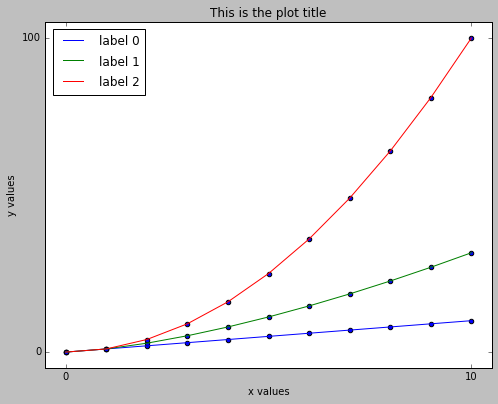

In [16]:
with plt.style.context(('classic')):
    
    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=3)

## Examining additional styles

Many plotting packages (i.e. `Seaborn` or `ggplot`) will include their own set of style files. These are considerably shorter in length than the `classic` style and server primarily to augment the default matplotlib settings.

In [22]:
mpl.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'rs_paper',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'rs_present',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

### The `Seaborn-paper` style

Below we examine the `Seaborn-paper` style. Note the reductions across the board in figure size, fontsize, etc.

In [ ]:
# %load /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/seaborn-paper.mplstyle
# Seaborn paper context
figure.figsize: 6.4, 4.4
axes.labelsize: 8.8
axes.titlesize: 9.6
xtick.labelsize: 8
ytick.labelsize: 8
legend.fontsize: 8

grid.linewidth: 0.8
lines.linewidth: 1.4
patch.linewidth: 0.24
lines.markersize: 5.6
lines.markeredgewidth: 0

xtick.major.width: 0.8
ytick.major.width: 0.8
xtick.minor.width: 0.4
ytick.minor.width: 0.4

xtick.major.pad: 5.6
ytick.major.pad: 5.6

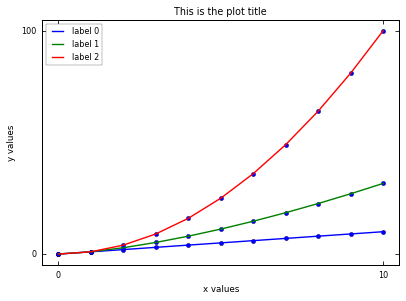

In [17]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('seaborn-paper')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=3)

### The `ggplot` style

Another popular style inspired by the aesthestics of the ggplot package, commonly by the `R` programming language for plotting data analysis.

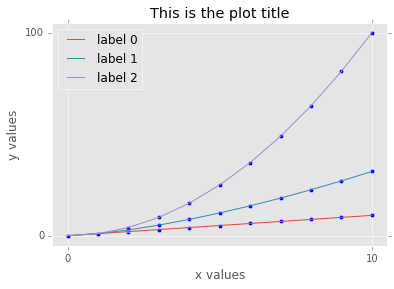

In [18]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('ggplot')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=3)

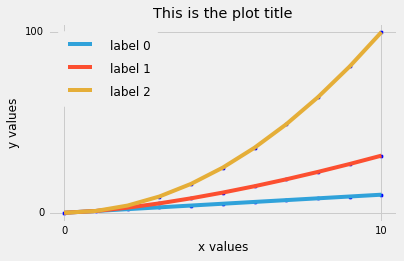

In [21]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('fivethirtyeight')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=3)

### The `seaborn-poster` style

An alternative to the poster style which uses larger figures and fontsizes.

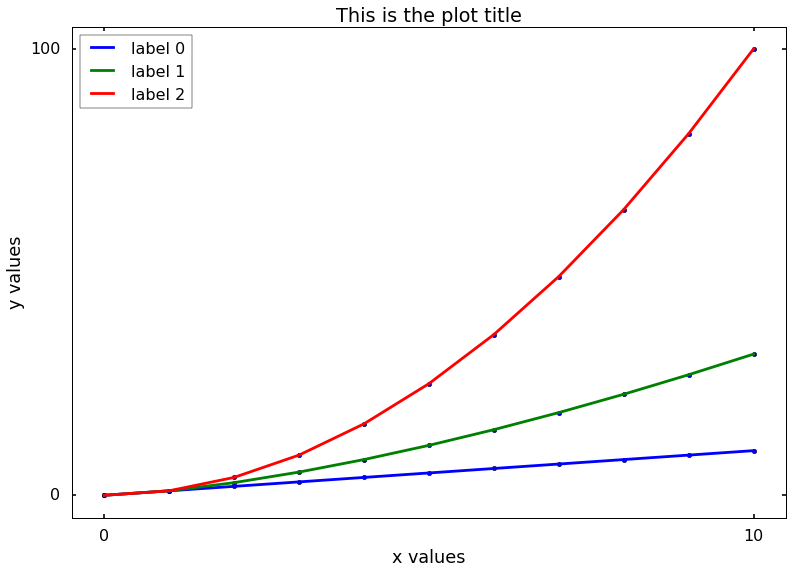

In [19]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('seaborn-poster')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=3)

### Colors - constructing and tranferring color schemes

We've already decided to use the Viridis color for pseudocolor-type plots. We now want to establish a color scheme that works for line plots. One solid option is the 20-color cycle based upon the [Tableau](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) color profiles. To use the profile with matlab, the RGB values must be converted to color-hex and passed to the style file.


In [31]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

tab20_hex = [rgbToHex(val) for val in tableau20]

#for i in range(len(tableau20)):    
#    r, g, b = tableau20[i]    
#    tableau20[i] = (r / 255., g / 255., b / 255.)   

In [30]:
import math

def rgbToHex(RGB):
    '''Assumes input is in the form RGB = (R,G,B)'''
    R = RGB[0]
    G = RGB[1]
    B = RGB[2]
    
    return toHex(R)+toHex(G)+toHex(B)

def toHex(n): 
    
    assert type(n) is int, "id is not an integer: %r" % n
    
    if math.isnan(n):
        return '00'
    else:
        n = max(0,min(n,255)) #place within [0,255]
        
        if n < 16:
            return hex(n)[::2] #skip the middle 
        else:
            return hex(n)[-2:]

## Construct two new styles: `rs-present` and `rs-paper`

Next we'll construct two new styles for RadiaSoft use. The first, `rs-present` can be a default style for notebook use. It will be designed to produce large, clear pictures for posters, talks, and IPython notebook demonstrations. The second, `rs-paper`, will be designed for clean, sharp, publication quality images.

One thing to note with `imshow` type plots is that the apsect ratio is set to be equal (`image.aspect: equal`), thus the imshow plots will not have the same size as other plots. In most instances, we expect users will likely specify their own plot sizes, but it is worth making note of this nuance.

In [37]:
#Look specifically at new parameters
with plt.style.context(('rs_paper')):
    print mpl.rcParams

agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: mpeg4
animation.convert_args: []
animation.convert_path: convert
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.axisbelow: False
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: True
axes.labelcolor: k
axes.labelpad: 5.0
axes.labelsize: 13.2
axes.labelweight: normal
axes.linewidth: 1.0
axes.prop_cycle: cycler(u'color', [u'#1f77b4', u'#aec7e8', u'#ff7f0e', u'#ffbb78', u'#2ca02c', u'#98df8a', u'#d62728', u'#ff9896', u'#9467bd', u'#c5b0d5', u'#8c564b', u'#c49c94', u'#e377c2', u'#f7b6d2', u'#7f7f7f', u'#c7c7c7', u'#bcbd22', u'#dbdb8d', u'#17b

#### rs-paper style

- Serif fonts
- Small and sharp figures

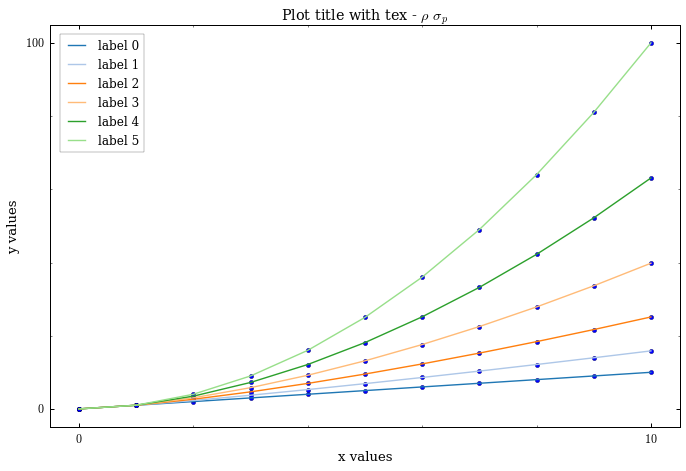

In [3]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('rs_paper')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=6, tex=True)

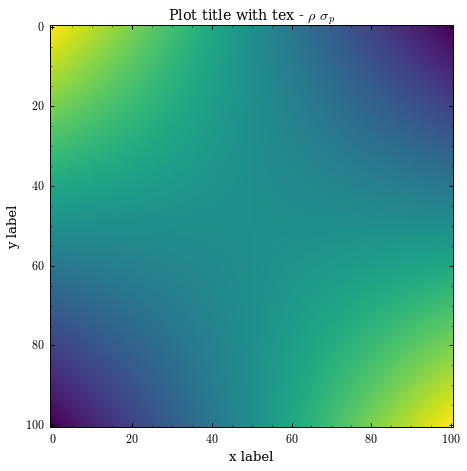

In [57]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('rs_paper')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_imshow(ax)

#### rs-present style

- Larger figures
- sans-serif fonts
- Relaxed style

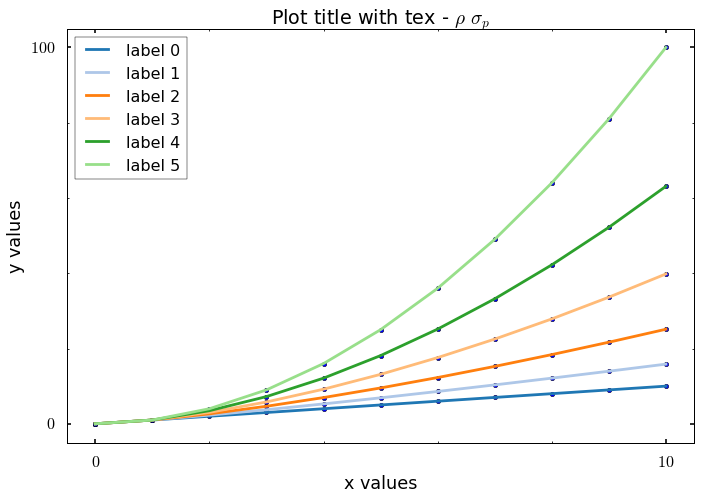

In [88]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


with plt.style.context(('rs_present')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_plot(ax, legend=True, numplots=6, tex=True)

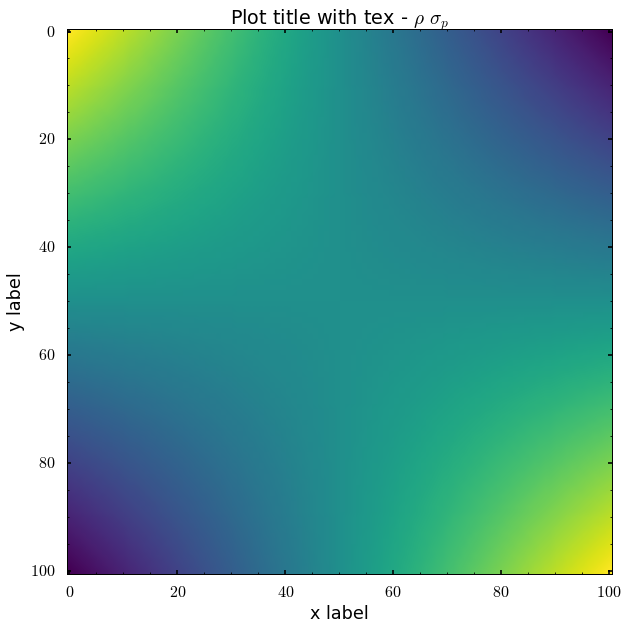

In [55]:
#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

with plt.style.context(('rs_present')):

    plt.close('all')
    fig, ax = plt.subplots()
    example_imshow(ax)

## Making changes

This is an ongoing project, and we expect to make continual changes over the next months and years. It's easy enough continue to develop different styles within an IPython session. Whenever changes are made to your local `.mplstyle` file, simply run the command `mpl.style.reload_library()` and the new changes will take effect upon your next plot.

In [83]:
mpl.style.reload_library()